# Predicting the Buildings' Energy Consumption

1. Introduction 

Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Warmer temperatures over time are changing weather patterns and disrupting the usual balance of nature. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions. 

2. Dataset

The dataset is from the Women in Data Science Datathon dataset in 2022. 
https://www.kaggle.com/c/widsdatathon2022/overview
 
The variables:
- "id", "building id",
- "Year_Factor", "anonymized year in which the weather and energy usage factors were observed",
- "State_Factor", "anonymized state in which the building is located",
- "building_class", "building classification",
- "facility_type", "building usage type",
- "floor_area", "floor area (in square feet) of the building",
- "year_built", "year in which the building was constructed",
- "energy_star_rating", "the energy star rating of the building",
- "ELEVATION", "elevation of the building location",
- "january_min_temp", "minimum temperature in January (in Fahrenheit) at the location of the building",
- "january_avg_temp", "average temperature in January (in Fahrenheit) at the location of the building",
- "january_max_temp", "maximum temperature in January (in Fahrenheit) at the location of the building",
- "cooling_degree_days", "cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.",
- "heating_degree_days", "heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.",
- "precipitation_inches", "annual precipitation in inches at the location of the building",
- "snowfall_inches", "annual snowfall in inches at the location of 
- "snowdepth_inches", "annual snow depth in inches at the location of the building",
- "avg_temp", "average temperature over a year at the location of the building",
- "days_below_30F", "total number of days below 30 degrees Fahrenheit at the location of the building",
- "days_below_20F", "total number of days below 20 degrees Fahrenheit at the location of the building",
- "days_below_10F", "total number of days below 10 degrees Fahrenheit at the location of the building",
- "days_below_0F", "total number of days below 0 degrees Fahrenheit at the location of the building",
- "days_above_80F", "total number of days above 80 degrees Fahrenheit at the location of the building",
- "days_above_90F", "total number of days above 90 degrees Fahrenheit at the location of the building",
- "days_above_100F", "total number of days above 100 degrees Fahrenheit at the location of the building",
- "days_above_110F", "total number of days above 110 degrees Fahrenheit at the location of the building",
- "direction_max_wind_speed", "wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).",
- "direction_peak_wind_speed", "wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).",
- "max_wind_speed", "maximum wind speed at the location of the building",
- "days_with_fog", "number of days with fog at the location of the building",
- "site_eui", "Target Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills",)

The target variable is site_eui.

3. Purpose

Using machine learning to predict building energy usage

4. Project ideas

 - Exploratory Data Analysis
 
 - Feature Engineering
     - Encoding the categorical features in both train and test set
     - Missing values
     - Normalizing data
     - Scaling on the site_eui variable to achieve Normal Distribution¶
 

## 1. Exploratory Data Analysis 

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# warnings reported for function updates, ignore them
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading traning data set
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
df_train.head(10)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
5,1,State_1,Commercial,Warehouse_Selfstorage,119900.0,1956.0,NaN,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,6.597715,5
6,1,State_1,Commercial,Warehouse_Nonrefrigerated,91367.0,1982.0,56.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,12.817841,6
7,1,State_1,Commercial,Warehouse_Nonrefrigerated,50422.0,1947.0,99.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,22.392014,7
8,1,State_1,Commercial,Office_Uncategorized,122020.0,1929.0,98.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,28.199578,8
9,1,State_1,Commercial,Office_Uncategorized,102612.0,1979.0,83.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,29.515952,9


In [7]:
df_test.head(10)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761
5,7,State_1,Commercial,Grocery_store_or_food_market,80520.0,1959.0,28.0,18.6,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75762
6,7,State_1,Commercial,Grocery_store_or_food_market,46800.0,1941.0,28.0,43.9,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75763
7,7,State_1,Commercial,Grocery_store_or_food_market,29094.0,1900.0,41.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75764
8,7,State_1,Commercial,Grocery_store_or_food_market,49500.0,1992.0,62.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75765
9,7,State_1,Commercial,Grocery_store_or_food_market,67346.0,1967.0,17.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75766


Test set has 63 columns because it does not contain the "site_eui" variable which is the energy usage of a building

In [9]:
df_train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [453]:
df_test.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [10]:
df_train.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object

### 1.1 Numerical variables

In [8]:
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  61


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


#### Temporal variables

In [9]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'year' in feature or 'Year' in feature]

year_feature

['Year_Factor', 'year_built']

Text(0.5, 1.0, 'Site Energy Usage vs Year_Factor')

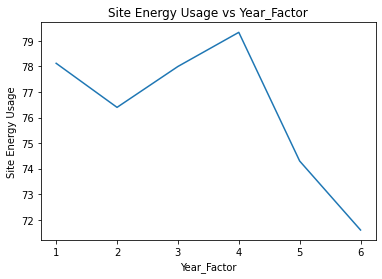

In [10]:
## I will check whether there is a relation between year factor and energy usage factors were observed and the Site Energy Usage
df_train.groupby('Year_Factor')['site_eui'].median().plot()
plt.xlabel('Year_Factor')
plt.ylabel('Site Energy Usage')
plt.title("Site Energy Usage vs Year_Factor")


#### Discrete Variables

In [11]:
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 5


In [12]:
discrete_feature

['days_below_0F',
 'days_above_110F',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed']

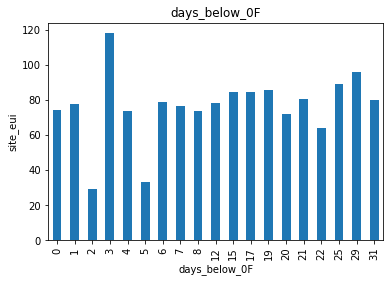

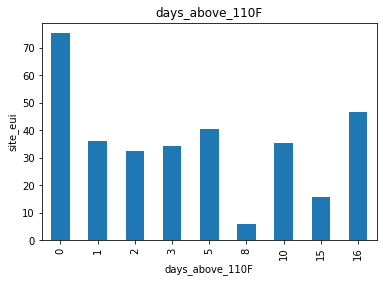

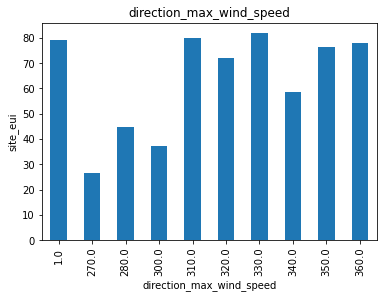

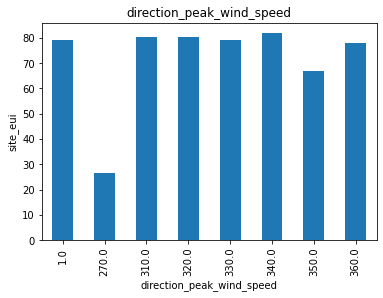

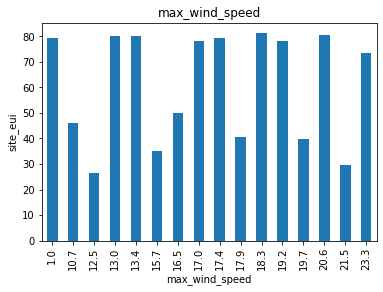

In [13]:
## Lets Find the realtionship between them and Site Energy Usage
for feature in discrete_feature:
    data=df_train.copy()
    data.groupby(feature)['site_eui'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('site_eui')
    plt.title(feature)
    plt.show()

### 1.2 Categorical Variables

In [14]:
categorical_features=[feature for feature in df_train.columns if data[feature].dtypes=='O']

In [15]:
df_train[categorical_features]

,State_Factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center
2,State_1,Commercial,Retail_Enclosed_mall
3,State_1,Commercial,Education_Other_classroom
4,State_1,Commercial,Warehouse_Nonrefrigerated
...,...,...,...
75752,State_11,Commercial,Office_Uncategorized
75753,State_11,Residential,5plus_Unit_Building
75754,State_11,Commercial,Commercial_Other
75755,State_11,Commercial,Commercial_Other


### 1.3 Missing Values

In [16]:
def count_missing(df):
    
    missing_df = pd.DataFrame(
        df.isna().sum().sort_values(ascending=False), columns=["count"]
    )
    missing_df["percent"] = missing_df["count"] / df.shape[0]
    return missing_df.query("count != 0")

In [17]:
#Missing value in traning set
count_missing(df_train)

,count,percent
days_with_fog,45796,0.604512
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
direction_max_wind_speed,41082,0.542287
energy_star_rating,26709,0.352561
year_built,1837,0.024249


In [18]:
#Missing value in test set
count_missing(df_test)

,count,percent
days_with_fog,9117,0.939413
max_wind_speed,8575,0.883565
direction_peak_wind_speed,8575,0.883565
direction_max_wind_speed,8575,0.883565
energy_star_rating,2254,0.232251
year_built,92,0.009480


<AxesSubplot:>

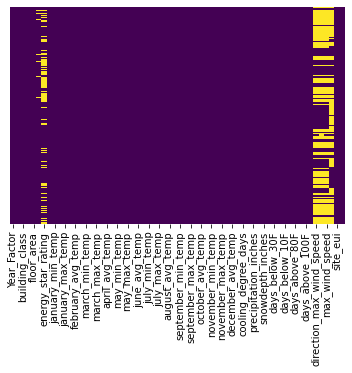

In [19]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

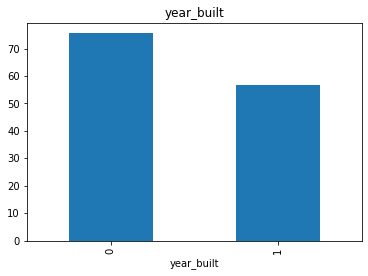

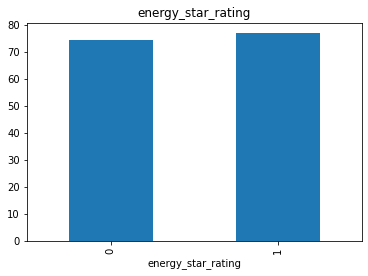

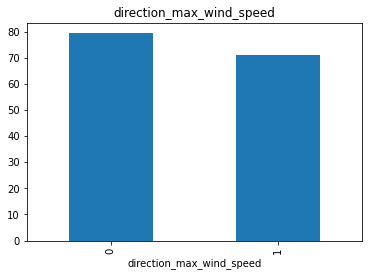

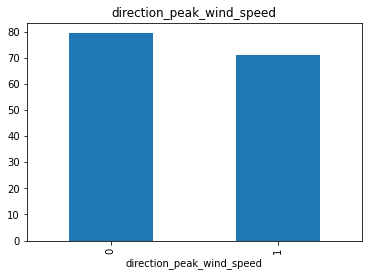

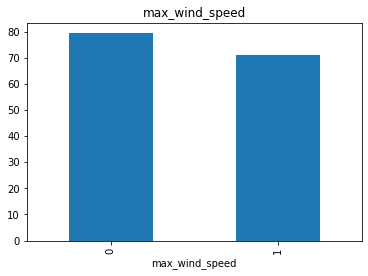

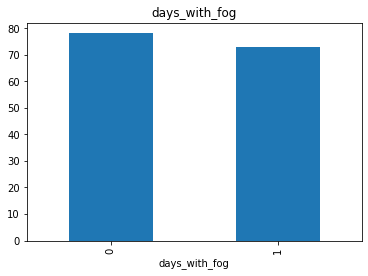

In [20]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
    
for feature in features_with_na:
    data = df_train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['site_eui'].median().plot.bar()
    plt.title(feature)
    plt.show()

I ploted some diagram to visualize the relationship between missing values and site_eui

Only the 'energy_star_rating' has higher energy consumption in case of missing value

## 2. Feature Engineering

- Encoding the categorical features in both train and test set

- Missing values were imputed for energy_star_rating and year_built

- Scalling on numerical feature

- Scaling on the site_eui variable to achieve Normal Distribution¶

In [21]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

#### A. Encoding the categorical features in both train and test set

In [22]:
def encoder(df_train, df_test):
    le = LabelEncoder()
    for col in df_train.columns:
        if df_train[col].dtypes == 'object':
            df_train[col] = le.fit_transform(df_train[col])
            le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
            df_test[col] = df_test[col].apply(lambda x: le_dict.get(x, -1))
    return df_train, df_test

In [23]:
df_train_encoded, df_test_encoded = encoder(df_train, df_test)

In [24]:
df_train_encoded

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,32,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,2,1,1,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,2,0,2,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,2,0,2,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


In [25]:
df_test_encoded

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,0,0,13,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,0,0,13,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,0,0,13,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,0,0,13,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,0,0,13,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,2,1,1,305925.0,2013.0,99.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85457
9701,7,2,1,1,34909.0,1910.0,94.0,26.5,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85458
9702,7,2,1,1,42393.0,2014.0,94.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85459
9703,7,2,1,1,25368.0,1992.0,79.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85460


#### B. Handling Missing Values

In [26]:
features = df_train_encoded.drop('site_eui',axis=1)
features.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,4


<AxesSubplot:xlabel='energy_star_rating'>

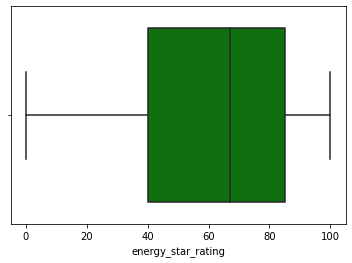

In [27]:
sns.boxplot(df_train_encoded['energy_star_rating'], color = 'green')

In [28]:
#Impute missing with mean in Energy_star_rating
df_train_encoded['energy_star_rating']=df_train_encoded['energy_star_rating'].fillna(df_train_encoded['energy_star_rating'].mean())


In [29]:
df_train_encoded.head(20)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.000000,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.000000,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.000000,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.000000,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.000000,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
5,1,0,0,58,119900.0,1956.0,61.048605,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,6.597715,5
6,1,0,0,56,91367.0,1982.0,56.000000,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,12.817841,6
7,1,0,0,56,50422.0,1947.0,99.000000,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,22.392014,7
8,1,0,0,32,122020.0,1929.0,98.000000,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,28.199578,8
9,1,0,0,32,102612.0,1979.0,83.000000,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,29.515952,9


In [30]:
df_test_encoded['energy_star_rating']=df_test_encoded['energy_star_rating'].fillna(df_test_encoded['energy_star_rating'].mean())


In [31]:
count_missing(df_train_encoded)

,count,percent
days_with_fog,45796,0.604512
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
direction_max_wind_speed,41082,0.542287
year_built,1837,0.024249


In [32]:
#Drop days_with_fog, direction_peak_wind_speed, max_wind_speed, direction_max_wind_speed and max_wind_speed
df_train_encoded.drop(['days_with_fog', 'direction_peak_wind_speed','direction_max_wind_speed', 'max_wind_speed'], axis = 1, inplace=True)
df_test_encoded.drop(['days_with_fog', 'direction_peak_wind_speed','direction_max_wind_speed', 'max_wind_speed'], axis = 1, inplace=True)


In [33]:
count_missing(df_train_encoded)

,count,percent
year_built,1837,0.024249


<AxesSubplot:xlabel='year_built'>

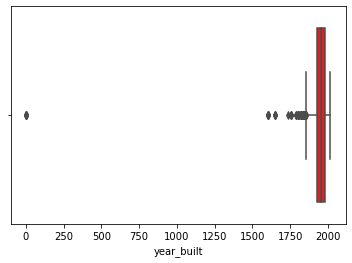

In [34]:
sns.boxplot(df_train_encoded['year_built'], color = 'red')

In [35]:
# Handling missing values in year_built
# for 6 rows with year_built = 0, fill with the mean of the facility_type, which is 1963 for Lodging_Hotel
df_train_encoded[df_train_encoded['year_built'] == 0]
df_train_encoded['year_built'] = df_train_encoded['year_built'].apply(lambda x: 1963 if x==0 else x)

# for the rest of the missing values, fill with the mean year_built of that state
year_built_dict = df_train_encoded.groupby('State_Factor')['year_built'].agg({'mean'}).to_dict()['mean']

for i in df_train_encoded['State_Factor'].unique():
    v = year_built_dict[i]
    index = df_train_encoded[df_train_encoded['State_Factor'] == i].index
    df_train_encoded.loc[index,'year_built'] = df_train_encoded.loc[index,'year_built'].apply(lambda x: v if np.isnan(x) else x) 

for i in df_test_encoded['State_Factor'].unique():
    if i in df_train_encoded['State_Factor'].unique():
        v = year_built_dict[i]
        index = df_test_encoded[df_test_encoded['State_Factor'] == i].index
        df_test_encoded.loc[index,'year_built'] = df_test_encoded.loc[index,'year_built'].apply(lambda x: v if np.isnan(x) else x) 

In [36]:
count_missing(df_train_encoded)

,count,percent


#### C. Normalizing Data 

In [37]:
X = df_train_encoded.drop('site_eui',axis=1)
Y = df_train_encoded['site_eui']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=46)


In [38]:
# define min max scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data
scaler.fit(X)
scaled = scaler.transform(X)
scaled_test = scaler.transform(X_test)

In [39]:
df_train_encoded

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.000000,2.4,36,50.500000,...,0,0,0,0,14,0,0,0,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.000000,1.8,36,50.500000,...,0,0,0,0,14,0,0,0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.000000,1.8,36,50.500000,...,0,0,0,0,14,0,0,0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.000000,1.8,36,50.500000,...,0,0,0,0,14,0,0,0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.000000,2.4,36,50.500000,...,0,0,0,0,14,0,0,0,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,32,20410.0,1995.0,8.000000,36.6,28,43.451613,...,6,0,0,0,25,3,0,0,132.918411,75752
75753,6,2,1,1,40489.0,1910.0,98.000000,36.6,28,43.451613,...,6,0,0,0,25,3,0,0,39.483672,75753
75754,6,2,0,2,28072.0,1917.0,61.048605,36.6,26,36.612903,...,26,2,0,0,6,0,0,0,48.404398,75754
75755,6,2,0,2,53575.0,2012.0,61.048605,36.6,26,36.612903,...,26,2,0,0,6,0,0,0,592.022750,75755


#### D. Scaling on the site_eui variable to achieve Normal Distribution

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

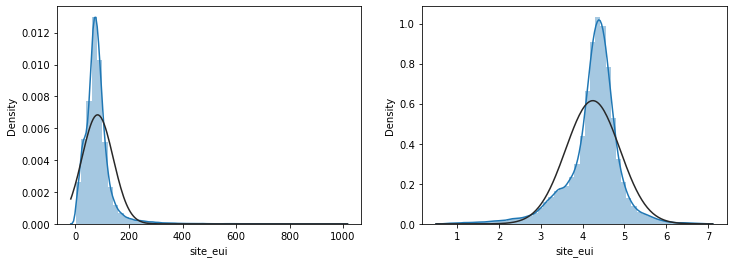

In [40]:
from scipy.stats import norm
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(df_train_encoded['site_eui'], ax=ax[0], fit=norm)
sns.distplot(np.log(df_train_encoded[('site_eui')]+1), ax=ax[1], fit= norm)

## 3. Modeling

3.1 Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.metrics import mean_squared_error

In [42]:
X = df_train_encoded.drop('site_eui',axis=1)
Y = df_train_encoded['site_eui']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=46)

In [44]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
lreg.coef_

array([-4.83896033e+00, -2.61271621e-01, -1.76913703e+01, -5.63982789e-01,
        1.12546454e-05,  1.88637372e-02, -9.33867045e-01, -2.89843882e-02,
        2.14343285e+00,  5.75881919e+00, -2.04074018e+00, -9.94903767e-01,
        1.28338205e+00, -5.87123256e-01, -7.32514568e-03,  7.55982190e-01,
        1.07662064e+00,  1.05718721e+00, -7.14069311e-01,  1.40093563e+00,
        6.13427642e-01,  1.54957388e+00, -4.90779714e-01, -4.73205971e-01,
        8.11080682e+00,  2.16456784e+00, -1.47714425e+00, -5.07331784e+00,
        5.30505095e-01,  2.88801415e+00,  4.23256133e+00, -1.10593306e+00,
       -4.46298547e-01,  6.04208349e+00,  1.49565898e+00,  9.32186805e-01,
        1.49880555e-01,  1.86899073e+00,  1.07969274e+00, -7.66359611e-01,
       -3.88591010e-01, -2.60682816e-01,  3.99139689e-01,  1.21732755e+00,
       -7.36055633e-02,  9.44558994e-02,  6.25117359e-01, -4.95230042e-01,
        8.14011841e-02,  6.64437803e+00,  5.15512323e-01,  9.28737381e-02,
       -1.52280193e+00,  

In [45]:
# Train set prediction
y_pred_train1 = lreg.predict(X_train)
y_pred_train1

array([131.89879397,  93.78711934,  80.22102984, ...,  81.68427778,
        96.56530406,  84.64581759])

In [58]:
import sklearn
import math
y_pred_test1 = lreg.predict(X_test)
mse1 = sklearn.metrics.mean_squared_error(y_test, y_pred_test1)
rmse1 = math.sqrt(mse1)
print(rmse1)
print(mse1)

53.02083192486729
2811.2086180050264


The linear regssion model is trained with RMSE = 53 and MSE = 2851

3.2 Ridge Regression

In [47]:
#load gridsearchCV
from sklearn.model_selection import GridSearchCV

#Load other modules
from sklearn.linear_model import Ridge

#Define grid of parameter. 
param_ridge = {'alpha' :  [0.001, 0.01, 0.1, 1, 10,100] } # dictionary 


#Define estimator: 

ridge_reg = Ridge()

# S3. Define GridSearchCV Estimation function, then train the model
ridge_grid = GridSearchCV(ridge_reg, param_ridge, cv = 5)
ridge_grid.fit(X_train, y_train)

y_pred_test3 =ridge_grid.predict(X_test)


In [59]:
mse3 = sklearn.metrics.mean_squared_error(y_test, y_pred_test3)
rmse3 = math.sqrt(mse3)
print(rmse3)
print(mse3)

53.01668594025534
2810.7689880876683


The Ridge model has RMSE = 53 and MSE = 2851 which is the same as linear regression model

3.3 LASSO Model

In [49]:
# Grid Search with CV - LASSO Case
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# S1. Define grid of parameter. 
param_lasso = {'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]} # dictionary 


# S2. Define estimator: 

lasso_reg = Lasso()

# S3. Define GridSearchCV Estimation function, then train the model
lasso_grid = GridSearchCV(lasso_reg, param_lasso, cv = 5)


lasso_grid.fit(X_train, y_train)

y_pred_test4 =lasso_grid.predict(X_test)

In [55]:
mse4 = sklearn.metrics.mean_squared_error(y_test, y_pred_test4)
rmse4 = math.sqrt(mse4)
print(rmse4)
print(mse4)

52.99778529341734
2808.7652460071627


The LASSO model has RMSE = 53 and MSE = 2851 which is the same to linear regression model and Ridege regression model

3.4 XGBoost

In [54]:
from xgboost import XGBRegressor
param_grid_xgboost = {
        "n_estimators": [100, 130], "criterion": ['gini', 'entropy'],
                       "max_depth": range(8, 10, 1)
    }
# Creating an object of the Grid Search class
grid= GridSearchCV(XGBRegressor(objective= "reg:squarederror"),param_grid_xgboost, verbose=3,cv=5)
# finding the best parameters
grid.fit(X_train, y_train)

# extracting the best parameters
criterion = grid.best_params_['criterion']
max_depth = grid.best_params_['max_depth']
n_estimators = grid.best_params_['n_estimators']

# creating a new model with the best parameters
xgb = XGBRegressor(criterion=criterion, max_depth=max_depth,n_estimators= n_estimators, n_jobs=-1 )
# training the mew model
xgb.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[17:01:35] WARNING: ../src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.433 total time=  14.2s
[17:01:49] WARNING: ../src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.490 total time=  14.8s
[17:02:04] WARNING: ../src/learner.c

[CV 4/5] END criterion=gini, max_depth=9, n_estimators=130;, score=0.513 total time=  22.8s
[17:07:13] WARNING: ../src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5] END criterion=gini, max_depth=9, n_estimators=130;, score=0.524 total time=  21.8s
[17:07:34] WARNING: ../src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=100;, score=0.433 total time=  14.6s
[

[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.495 total time=  25.0s
[17:13:28] WARNING: ../src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.513 total time=  25.8s
[17:13:54] WARNING: ../src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=130;, score=0.524 total time=  2

In [61]:
y_pred_test5 = xgb.predict(X_test)

mse5 = sklearn.metrics.mean_squared_error(y_test, y_pred_test5)
rmse5 = math.sqrt(mse5)
print(rmse5)
print(mse5)

41.274015381058156
1703.5443456758255


The XGBoost model has RMSE = 41 and MSE = 1703 


3.5 LightGMB 

In [64]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "n_jobs":1,
    "num_iterations": 10000
}

gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)



[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be

[141]	valid_0's l1: 27.024	valid_0's l2: 2534.01
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[142]	valid_0's l1: 26.9921	valid_0's l2: 2530.14
[143]	valid_0's l1: 26.9601	valid_0's l2: 2526.3
[144]	valid_0's l1: 26.9268	valid_0's l2: 2522.42
[145]	valid_0's l1: 26.8964	valid_0's l2: 2519.07
[146]	valid_0's l1: 26.8657	valid_0's l2: 2515.38
[147]	valid_0's l1: 26.8346	valid_0's l2: 2511.67
[148]	valid_0's l1: 26.8046	valid_0's l2: 2508.39
[149]	valid_0's l1: 26.7728	valid_0's l2: 2504.48
[150]	valid_0's l1: 26.7424	valid_0's l2: 2500.83
[151]	valid_0's l1: 26.7117	valid_0's l2: 2497.33
[152]	valid_0's l1: 26.6813	valid_0's l2: 2493.65
[153]	valid_0's l1: 26.6511	valid_0's l2: 2490.24
[154]	valid_0's l1: 26.6305	valid_0's l2: 2487.37
[155]	valid_0's l1: 26.5997	valid_0's l2: 2483.97
[156]	valid_0's l1: 26.5706	valid_0's l2: 2480.93
[157]	valid_0's l1: 26.5407	valid_0's l2: 2477.41
[158]	valid_0's l1: 26.5172	valid_0's l2: 2474.88
[159]	valid_0's l1: 26.4885

[291]	valid_0's l1: 23.9777	valid_0's l2: 2200.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's l1: 23.9657	valid_0's l2: 2199.4
[293]	valid_0's l1: 23.9508	valid_0's l2: 2197.74
[294]	valid_0's l1: 23.9404	valid_0's l2: 2196.77
[295]	valid_0's l1: 23.9262	valid_0's l2: 2195.21
[296]	valid_0's l1: 23.9116	valid_0's l2: 2193.68
[297]	valid_0's l1: 23.8978	valid_0's l2: 2192.3
[298]	valid_0's l1: 23.8832	valid_0's l2: 2190.64
[299]	valid_0's l1: 23.8688	valid_0's l2: 2188.98
[300]	valid_0's l1: 23.8545	valid_0's l2: 2187.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[301]	valid_0's l1: 23.8456	valid_0's l2: 2186.17
[302]	valid_0's l1: 23.8352	valid_0's l2: 2185.03
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[303]	valid_0's l1: 23.8254	valid_0's l2: 2184.04
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[304]	valid_0's l1: 23.8156	valid_0's l2: 2183.01
[L

[379]	valid_0's l1: 23.1338	valid_0's l2: 2111.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[380]	valid_0's l1: 23.1274	valid_0's l2: 2111.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[381]	valid_0's l1: 23.121	valid_0's l2: 2110.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[382]	valid_0's l1: 23.1148	valid_0's l2: 2109.85
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[383]	valid_0's l1: 23.1085	valid_0's l2: 2109.19
[384]	valid_0's l1: 23.1022	valid_0's l2: 2108.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[385]	valid_0's l1: 23.0963	valid_0's l2: 2107.87
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[386]	valid_0's l1: 23.0898	valid_0's l2: 2107.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[387]	valid_0's l1: 23.0837	valid_0's l2: 2106.62
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[467]	valid_0's l1: 22.62	valid_0's l2: 2055.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[468]	valid_0's l1: 22.6161	valid_0's l2: 2054.94
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[469]	valid_0's l1: 22.6113	valid_0's l2: 2054.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[470]	valid_0's l1: 22.6061	valid_0's l2: 2053.91
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[471]	valid_0's l1: 22.6023	valid_0's l2: 2053.57
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[472]	valid_0's l1: 22.5963	valid_0's l2: 2052.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[473]	valid_0's l1: 22.5919	valid_0's l2: 2052.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[474]	valid_0's l1: 22.5882	valid_0's l2: 2052.04
[Li

[536]	valid_0's l1: 22.3485	valid_0's l2: 2025.69
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[537]	valid_0's l1: 22.3463	valid_0's l2: 2025.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[538]	valid_0's l1: 22.3441	valid_0's l2: 2025.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[539]	valid_0's l1: 22.3422	valid_0's l2: 2025.18
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[540]	valid_0's l1: 22.3385	valid_0's l2: 2024.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[541]	valid_0's l1: 22.3354	valid_0's l2: 2024.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[542]	valid_0's l1: 22.3315	valid_0's l2: 2023.84
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[543]	valid_0's l1: 22.329	valid_0's l2: 2023.62
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[609]	valid_0's l1: 22.1565	valid_0's l2: 2004.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[610]	valid_0's l1: 22.1537	valid_0's l2: 2003.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[611]	valid_0's l1: 22.1511	valid_0's l2: 2003.65
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[612]	valid_0's l1: 22.149	valid_0's l2: 2003.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[613]	valid_0's l1: 22.1464	valid_0's l2: 2002.94
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[614]	valid_0's l1: 22.1438	valid_0's l2: 2002.57
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[615]	valid_0's l1: 22.1416	valid_0's l2: 2002.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[616]	valid_0's l1: 22.1383	valid_0's l2: 2001.85
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[677]	valid_0's l1: 22.0192	valid_0's l2: 1987.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[678]	valid_0's l1: 22.0171	valid_0's l2: 1986.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[679]	valid_0's l1: 22.0144	valid_0's l2: 1986.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[680]	valid_0's l1: 22.0115	valid_0's l2: 1985.98
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[681]	valid_0's l1: 22.0094	valid_0's l2: 1985.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[682]	valid_0's l1: 22.0072	valid_0's l2: 1985.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[683]	valid_0's l1: 22.0051	valid_0's l2: 1985.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[684]	valid_0's l1: 22.0038	valid_0's l2: 1984.94
[

[755]	valid_0's l1: 21.8833	valid_0's l2: 1967.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[756]	valid_0's l1: 21.8825	valid_0's l2: 1967.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[757]	valid_0's l1: 21.8818	valid_0's l2: 1967.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[758]	valid_0's l1: 21.881	valid_0's l2: 1967.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[759]	valid_0's l1: 21.8803	valid_0's l2: 1967.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[760]	valid_0's l1: 21.8796	valid_0's l2: 1966.95
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[761]	valid_0's l1: 21.8791	valid_0's l2: 1966.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[762]	valid_0's l1: 21.8784	valid_0's l2: 1966.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7

[827]	valid_0's l1: 21.8331	valid_0's l2: 1960.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[828]	valid_0's l1: 21.8321	valid_0's l2: 1960.08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[829]	valid_0's l1: 21.8316	valid_0's l2: 1960.02
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[830]	valid_0's l1: 21.8312	valid_0's l2: 1959.95
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[831]	valid_0's l1: 21.8308	valid_0's l2: 1959.86
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[832]	valid_0's l1: 21.8306	valid_0's l2: 1959.74
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[833]	valid_0's l1: 21.8304	valid_0's l2: 1959.63
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[834]	valid_0's l1: 21.8302	valid_0's l2: 1959.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[898]	valid_0's l1: 21.7609	valid_0's l2: 1947.17
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[899]	valid_0's l1: 21.7599	valid_0's l2: 1946.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's l1: 21.7595	valid_0's l2: 1946.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[901]	valid_0's l1: 21.7588	valid_0's l2: 1946.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[902]	valid_0's l1: 21.7577	valid_0's l2: 1946.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[903]	valid_0's l1: 21.7568	valid_0's l2: 1946.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[904]	valid_0's l1: 21.7559	valid_0's l2: 1946.49
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[905]	valid_0's l1: 21.7548	valid_0's l2: 1946.4
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[975]	valid_0's l1: 21.6997	valid_0's l2: 1937.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[976]	valid_0's l1: 21.6992	valid_0's l2: 1936.94
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[977]	valid_0's l1: 21.6989	valid_0's l2: 1936.87
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[978]	valid_0's l1: 21.6983	valid_0's l2: 1936.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[979]	valid_0's l1: 21.6973	valid_0's l2: 1936.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[980]	valid_0's l1: 21.6965	valid_0's l2: 1936.17
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[981]	valid_0's l1: 21.696	valid_0's l2: 1936.11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[982]	valid_0's l1: 21.6956	valid_0's l2: 1936.05
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1041]	valid_0's l1: 21.6631	valid_0's l2: 1929.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1042]	valid_0's l1: 21.6631	valid_0's l2: 1929.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1043]	valid_0's l1: 21.663	valid_0's l2: 1929.72
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1044]	valid_0's l1: 21.6625	valid_0's l2: 1929.61
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1045]	valid_0's l1: 21.6624	valid_0's l2: 1929.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1046]	valid_0's l1: 21.6622	valid_0's l2: 1929.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1047]	valid_0's l1: 21.6622	valid_0's l2: 1929.53
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1048]	valid_0's l1: 21.6621	valid_0's l2: 19

[1108]	valid_0's l1: 21.643	valid_0's l2: 1926.66
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1109]	valid_0's l1: 21.6428	valid_0's l2: 1926.66
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1110]	valid_0's l1: 21.6426	valid_0's l2: 1926.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1111]	valid_0's l1: 21.6424	valid_0's l2: 1926.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1112]	valid_0's l1: 21.6423	valid_0's l2: 1926.45
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1113]	valid_0's l1: 21.6421	valid_0's l2: 1926.35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1114]	valid_0's l1: 21.6419	valid_0's l2: 1926.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1115]	valid_0's l1: 21.6417	valid_0's l2: 1926.22
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1189]	valid_0's l1: 21.6045	valid_0's l2: 1918.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1190]	valid_0's l1: 21.6043	valid_0's l2: 1918.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1191]	valid_0's l1: 21.6041	valid_0's l2: 1918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1192]	valid_0's l1: 21.6042	valid_0's l2: 1917.94
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1193]	valid_0's l1: 21.6044	valid_0's l2: 1917.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1194]	valid_0's l1: 21.6044	valid_0's l2: 1917.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1195]	valid_0's l1: 21.6045	valid_0's l2: 1917.74
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1196]	valid_0's l1: 21.6046	valid_0's l2: 191

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1265]	valid_0's l1: 21.5935	valid_0's l2: 1912.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1266]	valid_0's l1: 21.5932	valid_0's l2: 1912.61
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1267]	valid_0's l1: 21.593	valid_0's l2: 1912.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1268]	valid_0's l1: 21.5929	valid_0's l2: 1912.55
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1269]	valid_0's l1: 21.5927	valid_0's l2: 1912.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1270]	valid_0's l1: 21.5926	valid_0's l2: 1912.45
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1271]	valid_0's l1: 21.5923	valid_0's l2: 1912.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1272]	valid_0's l1: 21.5916	valid_0's l2: 19

[1330]	valid_0's l1: 21.5699	valid_0's l2: 1908.55
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1331]	valid_0's l1: 21.57	valid_0's l2: 1908.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1332]	valid_0's l1: 21.5701	valid_0's l2: 1908.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1333]	valid_0's l1: 21.5701	valid_0's l2: 1908.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1334]	valid_0's l1: 21.5702	valid_0's l2: 1908.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1335]	valid_0's l1: 21.5701	valid_0's l2: 1908.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1336]	valid_0's l1: 21.5702	valid_0's l2: 1908.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1337]	valid_0's l1: 21.5702	valid_0's l2: 1908.42
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1398]	valid_0's l1: 21.5481	valid_0's l2: 1903.47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1399]	valid_0's l1: 21.5472	valid_0's l2: 1903.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1400]	valid_0's l1: 21.5469	valid_0's l2: 1903.27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1401]	valid_0's l1: 21.5468	valid_0's l2: 1903.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1402]	valid_0's l1: 21.5468	valid_0's l2: 1903.16
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1403]	valid_0's l1: 21.5466	valid_0's l2: 1903.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1404]	valid_0's l1: 21.5466	valid_0's l2: 1903.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1405]	valid_0's l1: 21.5462	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1474]	valid_0's l1: 21.5361	valid_0's l2: 1900.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1475]	valid_0's l1: 21.5355	valid_0's l2: 1900.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1476]	valid_0's l1: 21.5349	valid_0's l2: 1900.36
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1477]	valid_0's l1: 21.5345	valid_0's l2: 1900.27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1478]	valid_0's l1: 21.5341	valid_0's l2: 1900.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1479]	valid_0's l1: 21.5335	valid_0's l2: 1900.13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1480]	valid_0's l1: 21.5327	valid_0's l2: 1900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1481]	valid_0's l1: 21.5324	valid_0's l2: 189

[1543]	valid_0's l1: 21.5178	valid_0's l2: 1897.86
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1544]	valid_0's l1: 21.517	valid_0's l2: 1897.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1545]	valid_0's l1: 21.5168	valid_0's l2: 1897.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1546]	valid_0's l1: 21.5166	valid_0's l2: 1897.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1547]	valid_0's l1: 21.5166	valid_0's l2: 1897.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1548]	valid_0's l1: 21.5163	valid_0's l2: 1897.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1549]	valid_0's l1: 21.5161	valid_0's l2: 1897.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1550]	valid_0's l1: 21.5154	valid_0's l2: 1897.65
[LightGBM] [Warning] No further splits with positive gain, best gain:

[1619]	valid_0's l1: 21.5	valid_0's l2: 1892.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1620]	valid_0's l1: 21.5	valid_0's l2: 1892.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1621]	valid_0's l1: 21.4997	valid_0's l2: 1892.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1622]	valid_0's l1: 21.4994	valid_0's l2: 1892.47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1623]	valid_0's l1: 21.4992	valid_0's l2: 1892.47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1624]	valid_0's l1: 21.499	valid_0's l2: 1892.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1625]	valid_0's l1: 21.4987	valid_0's l2: 1892.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1626]	valid_0's l1: 21.4985	valid_0's l2: 1892.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1687]	valid_0's l1: 21.485	valid_0's l2: 1889.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1688]	valid_0's l1: 21.4846	valid_0's l2: 1889.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1689]	valid_0's l1: 21.4845	valid_0's l2: 1889.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1690]	valid_0's l1: 21.4841	valid_0's l2: 1889.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1691]	valid_0's l1: 21.4841	valid_0's l2: 1889.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1692]	valid_0's l1: 21.4843	valid_0's l2: 1889.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1693]	valid_0's l1: 21.4844	valid_0's l2: 1889.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1694]	valid_0's l1: 21.4841	valid_0's l2: 18

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1765]	valid_0's l1: 21.4713	valid_0's l2: 1885.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1766]	valid_0's l1: 21.4712	valid_0's l2: 1885.11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1767]	valid_0's l1: 21.4712	valid_0's l2: 1885.12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1768]	valid_0's l1: 21.4713	valid_0's l2: 1885.13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1769]	valid_0's l1: 21.4712	valid_0's l2: 1885.13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1770]	valid_0's l1: 21.4712	valid_0's l2: 1885.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1771]	valid_0's l1: 21.4709	valid_0's l2: 1885.04
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1772]	valid_0's l1: 21.4705	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1840]	valid_0's l1: 21.4522	valid_0's l2: 1881.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1841]	valid_0's l1: 21.4517	valid_0's l2: 1881.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1842]	valid_0's l1: 21.4513	valid_0's l2: 1881.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1843]	valid_0's l1: 21.4508	valid_0's l2: 1881.05
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1844]	valid_0's l1: 21.4504	valid_0's l2: 1881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1845]	valid_0's l1: 21.45	valid_0's l2: 1880.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1846]	valid_0's l1: 21.4497	valid_0's l2: 1880.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1847]	valid_0's l1: 21.4492	valid_0's l2: 1880.89

[1905]	valid_0's l1: 21.4402	valid_0's l2: 1879.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1906]	valid_0's l1: 21.4402	valid_0's l2: 1879.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1907]	valid_0's l1: 21.4403	valid_0's l2: 1879.74
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1908]	valid_0's l1: 21.4402	valid_0's l2: 1879.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1909]	valid_0's l1: 21.44	valid_0's l2: 1879.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1910]	valid_0's l1: 21.44	valid_0's l2: 1879.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1911]	valid_0's l1: 21.4397	valid_0's l2: 1879.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1912]	valid_0's l1: 21.4394	valid_0's l2: 1879.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1972]	valid_0's l1: 21.4354	valid_0's l2: 1876.87
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1973]	valid_0's l1: 21.4354	valid_0's l2: 1876.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1974]	valid_0's l1: 21.4354	valid_0's l2: 1876.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1975]	valid_0's l1: 21.4355	valid_0's l2: 1876.72
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1976]	valid_0's l1: 21.4355	valid_0's l2: 1876.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1977]	valid_0's l1: 21.4356	valid_0's l2: 1876.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1978]	valid_0's l1: 21.4356	valid_0's l2: 1876.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1979]	valid_0's l1: 21.4358	valid_0's l2: 18

[2047]	valid_0's l1: 21.4191	valid_0's l2: 1873.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2048]	valid_0's l1: 21.4189	valid_0's l2: 1873.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2049]	valid_0's l1: 21.4187	valid_0's l2: 1873.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2050]	valid_0's l1: 21.4186	valid_0's l2: 1873.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2051]	valid_0's l1: 21.4185	valid_0's l2: 1873.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2052]	valid_0's l1: 21.4185	valid_0's l2: 1873.19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2053]	valid_0's l1: 21.4186	valid_0's l2: 1873.15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2054]	valid_0's l1: 21.4186	valid_0's l2: 1873.13
[LightGBM] [Warning] No further splits with positive gain, best gai

[2113]	valid_0's l1: 21.412	valid_0's l2: 1870.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2114]	valid_0's l1: 21.4122	valid_0's l2: 1870.87
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2115]	valid_0's l1: 21.4121	valid_0's l2: 1870.83
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2116]	valid_0's l1: 21.4121	valid_0's l2: 1870.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2117]	valid_0's l1: 21.4123	valid_0's l2: 1870.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2118]	valid_0's l1: 21.4125	valid_0's l2: 1870.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2119]	valid_0's l1: 21.4126	valid_0's l2: 1870.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2120]	valid_0's l1: 21.4129	valid_0's l2: 1870.75
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[2190]	valid_0's l1: 21.4058	valid_0's l2: 1866.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2191]	valid_0's l1: 21.4055	valid_0's l2: 1866.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2192]	valid_0's l1: 21.4052	valid_0's l2: 1866.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2193]	valid_0's l1: 21.405	valid_0's l2: 1866.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2194]	valid_0's l1: 21.4048	valid_0's l2: 1866.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2195]	valid_0's l1: 21.4045	valid_0's l2: 1866.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2196]	valid_0's l1: 21.4043	valid_0's l2: 1866.83
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2197]	valid_0's l1: 21.404	valid_0's l2: 1866.84
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[2258]	valid_0's l1: 21.3989	valid_0's l2: 1864.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2259]	valid_0's l1: 21.399	valid_0's l2: 1864.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2260]	valid_0's l1: 21.3989	valid_0's l2: 1864.08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2261]	valid_0's l1: 21.3984	valid_0's l2: 1863.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2262]	valid_0's l1: 21.3982	valid_0's l2: 1863.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2263]	valid_0's l1: 21.3975	valid_0's l2: 1863.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2264]	valid_0's l1: 21.3971	valid_0's l2: 1863.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2265]	valid_0's l1: 21.3967	valid_0's l2: 1863.55
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[2327]	valid_0's l1: 21.3846	valid_0's l2: 1861.27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2328]	valid_0's l1: 21.3836	valid_0's l2: 1861.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2329]	valid_0's l1: 21.383	valid_0's l2: 1860.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2330]	valid_0's l1: 21.3825	valid_0's l2: 1860.86
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2331]	valid_0's l1: 21.3823	valid_0's l2: 1860.83
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2332]	valid_0's l1: 21.382	valid_0's l2: 1860.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2333]	valid_0's l1: 21.3816	valid_0's l2: 1860.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2334]	valid_0's l1: 21.3813	valid_0's l2: 1860.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2399]	valid_0's l1: 21.3773	valid_0's l2: 1859.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2400]	valid_0's l1: 21.3772	valid_0's l2: 1859.74
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2401]	valid_0's l1: 21.377	valid_0's l2: 1859.74
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2402]	valid_0's l1: 21.3769	valid_0's l2: 1859.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2403]	valid_0's l1: 21.3767	valid_0's l2: 1859.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2404]	valid_0's l1: 21.3766	valid_0's l2: 1859.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2405]	valid_0's l1: 21.3766	valid_0's l2: 1859.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2406]	valid_0's l1: 21.3764	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2471]	valid_0's l1: 21.3702	valid_0's l2: 1859.03
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2472]	valid_0's l1: 21.3701	valid_0's l2: 1859.03
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2473]	valid_0's l1: 21.3699	valid_0's l2: 1858.99
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2474]	valid_0's l1: 21.3698	valid_0's l2: 1858.96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2475]	valid_0's l1: 21.3695	valid_0's l2: 1858.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2476]	valid_0's l1: 21.3691	valid_0's l2: 1858.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2477]	valid_0's l1: 21.3689	valid_0's l2: 1858.86
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2478]	valid_0's l1: 21.3686	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2538]	valid_0's l1: 21.3571	valid_0's l2: 1857.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2539]	valid_0's l1: 21.3571	valid_0's l2: 1857.12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2540]	valid_0's l1: 21.3569	valid_0's l2: 1857.11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2541]	valid_0's l1: 21.3567	valid_0's l2: 1857.12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2542]	valid_0's l1: 21.3564	valid_0's l2: 1857.12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2543]	valid_0's l1: 21.3562	valid_0's l2: 1857.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2544]	valid_0's l1: 21.3559	valid_0's l2: 1857.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2545]	valid_0's l1: 21.3554	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2609]	valid_0's l1: 21.3555	valid_0's l2: 1855.08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2610]	valid_0's l1: 21.3551	valid_0's l2: 1855.03
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2611]	valid_0's l1: 21.3545	valid_0's l2: 1854.95
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2612]	valid_0's l1: 21.3541	valid_0's l2: 1854.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2613]	valid_0's l1: 21.3536	valid_0's l2: 1854.84
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2614]	valid_0's l1: 21.3533	valid_0's l2: 1854.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2615]	valid_0's l1: 21.3529	valid_0's l2: 1854.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2616]	valid_0's l1: 21.3524	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2675]	valid_0's l1: 21.3418	valid_0's l2: 1853.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2676]	valid_0's l1: 21.3418	valid_0's l2: 1853.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2677]	valid_0's l1: 21.3419	valid_0's l2: 1853.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2678]	valid_0's l1: 21.3419	valid_0's l2: 1853.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2679]	valid_0's l1: 21.342	valid_0's l2: 1853.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2680]	valid_0's l1: 21.342	valid_0's l2: 1853.22
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2681]	valid_0's l1: 21.3419	valid_0's l2: 1853.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2682]	valid_0's l1: 21.3421	valid_0's l2: 18

[2745]	valid_0's l1: 21.3352	valid_0's l2: 1851.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2746]	valid_0's l1: 21.3351	valid_0's l2: 1851.49
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2747]	valid_0's l1: 21.3351	valid_0's l2: 1851.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2748]	valid_0's l1: 21.3354	valid_0's l2: 1851.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2749]	valid_0's l1: 21.3356	valid_0's l2: 1851.49
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2750]	valid_0's l1: 21.3357	valid_0's l2: 1851.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2751]	valid_0's l1: 21.3354	valid_0's l2: 1851.47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2752]	valid_0's l1: 21.335	valid_0's l2: 1851.43
[LightGBM] [Warning] No further splits with positive gain, best gain:

[2811]	valid_0's l1: 21.3221	valid_0's l2: 1848.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2812]	valid_0's l1: 21.3222	valid_0's l2: 1848.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2813]	valid_0's l1: 21.3219	valid_0's l2: 1848.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2814]	valid_0's l1: 21.3216	valid_0's l2: 1848.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2815]	valid_0's l1: 21.3211	valid_0's l2: 1848.61
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2816]	valid_0's l1: 21.3206	valid_0's l2: 1848.53
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2817]	valid_0's l1: 21.32	valid_0's l2: 1848.45
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2818]	valid_0's l1: 21.3196	valid_0's l2: 1848.38
[LightGBM] [Warning] No further splits with positive gain, best gain:

[2890]	valid_0's l1: 21.3083	valid_0's l2: 1846.27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2891]	valid_0's l1: 21.3079	valid_0's l2: 1846.19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2892]	valid_0's l1: 21.3075	valid_0's l2: 1846.13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2893]	valid_0's l1: 21.3077	valid_0's l2: 1846.11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2894]	valid_0's l1: 21.3072	valid_0's l2: 1846.05
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2895]	valid_0's l1: 21.3069	valid_0's l2: 1845.99
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2896]	valid_0's l1: 21.3066	valid_0's l2: 1845.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2897]	valid_0's l1: 21.3062	valid_0's l2: 1845.88
[LightGBM] [Warning] No further splits with positive gain, best gai

[2958]	valid_0's l1: 21.2887	valid_0's l2: 1843.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2959]	valid_0's l1: 21.2886	valid_0's l2: 1843.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2960]	valid_0's l1: 21.2883	valid_0's l2: 1843.65
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2961]	valid_0's l1: 21.288	valid_0's l2: 1843.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2962]	valid_0's l1: 21.2879	valid_0's l2: 1843.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2963]	valid_0's l1: 21.2877	valid_0's l2: 1843.45
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2964]	valid_0's l1: 21.2878	valid_0's l2: 1843.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2965]	valid_0's l1: 21.2876	valid_0's l2: 1843.35
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3026]	valid_0's l1: 21.2905	valid_0's l2: 1842.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3027]	valid_0's l1: 21.291	valid_0's l2: 1842.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3028]	valid_0's l1: 21.2913	valid_0's l2: 1842.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3029]	valid_0's l1: 21.2916	valid_0's l2: 1842.85
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3030]	valid_0's l1: 21.292	valid_0's l2: 1842.87
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3031]	valid_0's l1: 21.2919	valid_0's l2: 1842.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3032]	valid_0's l1: 21.292	valid_0's l2: 1842.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3033]	valid_0's l1: 21.2922	valid_0's l2: 1842

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3097]	valid_0's l1: 21.2876	valid_0's l2: 1841.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3098]	valid_0's l1: 21.2874	valid_0's l2: 1841.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3099]	valid_0's l1: 21.2872	valid_0's l2: 1841.12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3100]	valid_0's l1: 21.2872	valid_0's l2: 1841.04
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3101]	valid_0's l1: 21.2873	valid_0's l2: 1841.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3102]	valid_0's l1: 21.2873	valid_0's l2: 1841.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3103]	valid_0's l1: 21.2873	valid_0's l2: 1841.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3104]	valid_0's l1: 21.2874	valid_0's l2: 18

[3164]	valid_0's l1: 21.2849	valid_0's l2: 1840.35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3165]	valid_0's l1: 21.2852	valid_0's l2: 1840.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3166]	valid_0's l1: 21.2855	valid_0's l2: 1840.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3167]	valid_0's l1: 21.2857	valid_0's l2: 1840.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3168]	valid_0's l1: 21.2857	valid_0's l2: 1840.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3169]	valid_0's l1: 21.2859	valid_0's l2: 1840.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3170]	valid_0's l1: 21.2859	valid_0's l2: 1840.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3171]	valid_0's l1: 21.2859	valid_0's l2: 1840.39
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3242]	valid_0's l1: 21.28	valid_0's l2: 1838.96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3243]	valid_0's l1: 21.2799	valid_0's l2: 1838.98
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3244]	valid_0's l1: 21.28	valid_0's l2: 1838.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3245]	valid_0's l1: 21.2801	valid_0's l2: 1838.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3246]	valid_0's l1: 21.2799	valid_0's l2: 1838.91
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3247]	valid_0's l1: 21.28	valid_0's l2: 1838.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3248]	valid_0's l1: 21.2802	valid_0's l2: 1838.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3249]	valid_0's l1: 21.2803	valid_0's l2: 1838.92


[3309]	valid_0's l1: 21.2768	valid_0's l2: 1837.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3310]	valid_0's l1: 21.2773	valid_0's l2: 1837.65
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3311]	valid_0's l1: 21.2773	valid_0's l2: 1837.65
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3312]	valid_0's l1: 21.2771	valid_0's l2: 1837.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3313]	valid_0's l1: 21.2771	valid_0's l2: 1837.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3314]	valid_0's l1: 21.2774	valid_0's l2: 1837.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3315]	valid_0's l1: 21.2773	valid_0's l2: 1837.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3316]	valid_0's l1: 21.2772	valid_0's l2: 1837.6
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[3382]	valid_0's l1: 21.2682	valid_0's l2: 1835.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3383]	valid_0's l1: 21.268	valid_0's l2: 1835.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3384]	valid_0's l1: 21.2679	valid_0's l2: 1835.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3385]	valid_0's l1: 21.2678	valid_0's l2: 1835.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3386]	valid_0's l1: 21.2678	valid_0's l2: 1835.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3387]	valid_0's l1: 21.2679	valid_0's l2: 1835.62
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3388]	valid_0's l1: 21.2677	valid_0's l2: 1835.55
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3389]	valid_0's l1: 21.2676	valid_0's l2: 1835.52
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3452]	valid_0's l1: 21.2695	valid_0's l2: 1833.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3453]	valid_0's l1: 21.2697	valid_0's l2: 1833.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3454]	valid_0's l1: 21.2699	valid_0's l2: 1833.83
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3455]	valid_0's l1: 21.2702	valid_0's l2: 1833.84
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3456]	valid_0's l1: 21.2703	valid_0's l2: 1833.83
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3457]	valid_0's l1: 21.2704	valid_0's l2: 1833.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3458]	valid_0's l1: 21.2707	valid_0's l2: 1833.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3459]	valid_0's l1: 21.271	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3524]	valid_0's l1: 21.2642	valid_0's l2: 1832.62
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3525]	valid_0's l1: 21.2635	valid_0's l2: 1832.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3526]	valid_0's l1: 21.2633	valid_0's l2: 1832.53
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3527]	valid_0's l1: 21.2628	valid_0's l2: 1832.45
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3528]	valid_0's l1: 21.2624	valid_0's l2: 1832.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3529]	valid_0's l1: 21.2624	valid_0's l2: 1832.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3530]	valid_0's l1: 21.2617	valid_0's l2: 1832.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3531]	valid_0's l1: 21.2618	valid_0's l2: 18

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3602]	valid_0's l1: 21.2617	valid_0's l2: 1831.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3603]	valid_0's l1: 21.2618	valid_0's l2: 1831.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3604]	valid_0's l1: 21.262	valid_0's l2: 1831.29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3605]	valid_0's l1: 21.262	valid_0's l2: 1831.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3606]	valid_0's l1: 21.2622	valid_0's l2: 1831.29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3607]	valid_0's l1: 21.2623	valid_0's l2: 1831.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3608]	valid_0's l1: 21.2623	valid_0's l2: 1831.29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3609]	valid_0's l1: 21.2624	valid_0's l2: 18

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3679]	valid_0's l1: 21.2586	valid_0's l2: 1830.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3680]	valid_0's l1: 21.2585	valid_0's l2: 1830
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3681]	valid_0's l1: 21.2582	valid_0's l2: 1829.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3682]	valid_0's l1: 21.2581	valid_0's l2: 1829.88
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3683]	valid_0's l1: 21.2578	valid_0's l2: 1829.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3684]	valid_0's l1: 21.2576	valid_0's l2: 1829.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3685]	valid_0's l1: 21.2573	valid_0's l2: 1829.72
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3686]	valid_0's l1: 21.2571	valid_0's l2: 182

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3748]	valid_0's l1: 21.2528	valid_0's l2: 1828.72
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3749]	valid_0's l1: 21.2527	valid_0's l2: 1828.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3750]	valid_0's l1: 21.2524	valid_0's l2: 1828.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3751]	valid_0's l1: 21.2527	valid_0's l2: 1828.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3752]	valid_0's l1: 21.2521	valid_0's l2: 1828.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3753]	valid_0's l1: 21.2517	valid_0's l2: 1828.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3754]	valid_0's l1: 21.2513	valid_0's l2: 1828.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3755]	valid_0's l1: 21.2509	valid_0's l2: 

[3815]	valid_0's l1: 21.2488	valid_0's l2: 1826.88
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3816]	valid_0's l1: 21.2489	valid_0's l2: 1826.86
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3817]	valid_0's l1: 21.2488	valid_0's l2: 1826.83
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3818]	valid_0's l1: 21.2488	valid_0's l2: 1826.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3819]	valid_0's l1: 21.2489	valid_0's l2: 1826.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3820]	valid_0's l1: 21.2489	valid_0's l2: 1826.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3821]	valid_0's l1: 21.2491	valid_0's l2: 1826.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3822]	valid_0's l1: 21.2492	valid_0's l2: 1826.73
[LightGBM] [Warning] No further splits with positive gain, best gain

[3890]	valid_0's l1: 21.2441	valid_0's l2: 1824.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3891]	valid_0's l1: 21.2439	valid_0's l2: 1824.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3892]	valid_0's l1: 21.2439	valid_0's l2: 1824.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3893]	valid_0's l1: 21.2437	valid_0's l2: 1824.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3894]	valid_0's l1: 21.2435	valid_0's l2: 1824.32
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3895]	valid_0's l1: 21.2433	valid_0's l2: 1824.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3896]	valid_0's l1: 21.2433	valid_0's l2: 1824.29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3897]	valid_0's l1: 21.2432	valid_0's l2: 1824.27
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3966]	valid_0's l1: 21.2393	valid_0's l2: 1823.32
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3967]	valid_0's l1: 21.239	valid_0's l2: 1823.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3968]	valid_0's l1: 21.2387	valid_0's l2: 1823.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3969]	valid_0's l1: 21.2387	valid_0's l2: 1823.27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3970]	valid_0's l1: 21.2387	valid_0's l2: 1823.27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3971]	valid_0's l1: 21.2388	valid_0's l2: 1823.22
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3972]	valid_0's l1: 21.2388	valid_0's l2: 1823.18
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3973]	valid_0's l1: 21.2388	valid_0's l2: 18

[4040]	valid_0's l1: 21.2305	valid_0's l2: 1821.46
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4041]	valid_0's l1: 21.2305	valid_0's l2: 1821.46
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4042]	valid_0's l1: 21.2304	valid_0's l2: 1821.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4043]	valid_0's l1: 21.2303	valid_0's l2: 1821.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4044]	valid_0's l1: 21.23	valid_0's l2: 1821.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4045]	valid_0's l1: 21.2298	valid_0's l2: 1821.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4046]	valid_0's l1: 21.2297	valid_0's l2: 1821.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4047]	valid_0's l1: 21.2295	valid_0's l2: 1821.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[4112]	valid_0's l1: 21.224	valid_0's l2: 1820.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4113]	valid_0's l1: 21.2235	valid_0's l2: 1820.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4114]	valid_0's l1: 21.223	valid_0's l2: 1820.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4115]	valid_0's l1: 21.2229	valid_0's l2: 1820.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4116]	valid_0's l1: 21.2228	valid_0's l2: 1820.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4117]	valid_0's l1: 21.2224	valid_0's l2: 1820.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4118]	valid_0's l1: 21.2222	valid_0's l2: 1820.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4119]	valid_0's l1: 21.2221	valid_0's l2: 1820.19
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[4187]	valid_0's l1: 21.2148	valid_0's l2: 1818.85
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4188]	valid_0's l1: 21.2149	valid_0's l2: 1818.84
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4189]	valid_0's l1: 21.2149	valid_0's l2: 1818.83
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4190]	valid_0's l1: 21.215	valid_0's l2: 1818.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4191]	valid_0's l1: 21.2146	valid_0's l2: 1818.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4192]	valid_0's l1: 21.2138	valid_0's l2: 1818.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4193]	valid_0's l1: 21.213	valid_0's l2: 1818.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4194]	valid_0's l1: 21.2125	valid_0's l2: 1818.63
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4256]	valid_0's l1: 21.2062	valid_0's l2: 1816.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4257]	valid_0's l1: 21.2061	valid_0's l2: 1816.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4258]	valid_0's l1: 21.206	valid_0's l2: 1816.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4259]	valid_0's l1: 21.206	valid_0's l2: 1816.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4260]	valid_0's l1: 21.2059	valid_0's l2: 1816.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4261]	valid_0's l1: 21.2059	valid_0's l2: 1816.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4262]	valid_0's l1: 21.2058	valid_0's l2: 1816.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4263]	valid_0's l1: 21.2058	valid_0's l2: 1816.8

[4329]	valid_0's l1: 21.1989	valid_0's l2: 1815.32
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4330]	valid_0's l1: 21.1987	valid_0's l2: 1815.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4331]	valid_0's l1: 21.199	valid_0's l2: 1815.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4332]	valid_0's l1: 21.1991	valid_0's l2: 1815.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4333]	valid_0's l1: 21.1991	valid_0's l2: 1815.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4334]	valid_0's l1: 21.1991	valid_0's l2: 1815.19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4335]	valid_0's l1: 21.1991	valid_0's l2: 1815.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4336]	valid_0's l1: 21.1991	valid_0's l2: 1815.09
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4400]	valid_0's l1: 21.2055	valid_0's l2: 1814.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4401]	valid_0's l1: 21.2057	valid_0's l2: 1814.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4402]	valid_0's l1: 21.2058	valid_0's l2: 1814.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4403]	valid_0's l1: 21.206	valid_0's l2: 1814.63
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4404]	valid_0's l1: 21.2061	valid_0's l2: 1814.66
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4405]	valid_0's l1: 21.2063	valid_0's l2: 1814.7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4406]	valid_0's l1: 21.2063	valid_0's l2: 1814.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4407]	valid_0's l1: 21.2064	valid_0's l2: 18

[4473]	valid_0's l1: 21.2035	valid_0's l2: 1813.84
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4474]	valid_0's l1: 21.2035	valid_0's l2: 1813.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4475]	valid_0's l1: 21.2036	valid_0's l2: 1813.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4476]	valid_0's l1: 21.2037	valid_0's l2: 1813.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4477]	valid_0's l1: 21.2038	valid_0's l2: 1813.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4478]	valid_0's l1: 21.204	valid_0's l2: 1813.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4479]	valid_0's l1: 21.2041	valid_0's l2: 1813.76
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4480]	valid_0's l1: 21.2042	valid_0's l2: 1813.7
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[4540]	valid_0's l1: 21.2039	valid_0's l2: 1812.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4541]	valid_0's l1: 21.2037	valid_0's l2: 1812.7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4542]	valid_0's l1: 21.2036	valid_0's l2: 1812.69
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4543]	valid_0's l1: 21.2036	valid_0's l2: 1812.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4544]	valid_0's l1: 21.2035	valid_0's l2: 1812.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4545]	valid_0's l1: 21.2035	valid_0's l2: 1812.69
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4546]	valid_0's l1: 21.2034	valid_0's l2: 1812.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4547]	valid_0's l1: 21.2033	valid_0's l2: 1812.67
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4616]	valid_0's l1: 21.1994	valid_0's l2: 1812.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4617]	valid_0's l1: 21.1991	valid_0's l2: 1812.35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4618]	valid_0's l1: 21.1992	valid_0's l2: 1812.34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4619]	valid_0's l1: 21.199	valid_0's l2: 1812.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4620]	valid_0's l1: 21.1988	valid_0's l2: 1812.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4621]	valid_0's l1: 21.1988	valid_0's l2: 1812.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4622]	valid_0's l1: 21.1988	valid_0's l2: 1812.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4623]	valid_0's l1: 21.1987	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4691]	valid_0's l1: 21.1966	valid_0's l2: 1810.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4692]	valid_0's l1: 21.1966	valid_0's l2: 1810.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4693]	valid_0's l1: 21.1966	valid_0's l2: 1810.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4694]	valid_0's l1: 21.1967	valid_0's l2: 1810.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4695]	valid_0's l1: 21.1967	valid_0's l2: 1810.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4696]	valid_0's l1: 21.1968	valid_0's l2: 1810.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4697]	valid_0's l1: 21.1968	valid_0's l2: 1810.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4698]	valid_0's l1: 21.197	valid_0's l2: 181

[4757]	valid_0's l1: 21.2011	valid_0's l2: 1809.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4758]	valid_0's l1: 21.2011	valid_0's l2: 1809.91
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4759]	valid_0's l1: 21.2011	valid_0's l2: 1809.91
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4760]	valid_0's l1: 21.201	valid_0's l2: 1809.92
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4761]	valid_0's l1: 21.2011	valid_0's l2: 1809.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4762]	valid_0's l1: 21.2011	valid_0's l2: 1809.94
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4763]	valid_0's l1: 21.2012	valid_0's l2: 1809.95
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4764]	valid_0's l1: 21.2012	valid_0's l2: 1809.97
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4824]	valid_0's l1: 21.2021	valid_0's l2: 1810.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4825]	valid_0's l1: 21.2021	valid_0's l2: 1810.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4826]	valid_0's l1: 21.2019	valid_0's l2: 1810.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4827]	valid_0's l1: 21.2017	valid_0's l2: 1810.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4828]	valid_0's l1: 21.2015	valid_0's l2: 1810.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4829]	valid_0's l1: 21.2014	valid_0's l2: 1810.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4830]	valid_0's l1: 21.2013	valid_0's l2: 1810.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4831]	valid_0's l1: 21.201	valid_0's l2: 18

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4892]	valid_0's l1: 21.1995	valid_0's l2: 1809.47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4893]	valid_0's l1: 21.1994	valid_0's l2: 1809.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4894]	valid_0's l1: 21.1994	valid_0's l2: 1809.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4895]	valid_0's l1: 21.1993	valid_0's l2: 1809.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4896]	valid_0's l1: 21.1993	valid_0's l2: 1809.34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4897]	valid_0's l1: 21.1993	valid_0's l2: 1809.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4898]	valid_0's l1: 21.1993	valid_0's l2: 1809.29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4899]	valid_0's l1: 21.1993	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4966]	valid_0's l1: 21.1966	valid_0's l2: 1809.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4967]	valid_0's l1: 21.1967	valid_0's l2: 1809.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4968]	valid_0's l1: 21.1966	valid_0's l2: 1809.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4969]	valid_0's l1: 21.1964	valid_0's l2: 1809.34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4970]	valid_0's l1: 21.1962	valid_0's l2: 1809.35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4971]	valid_0's l1: 21.1962	valid_0's l2: 1809.34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4972]	valid_0's l1: 21.1962	valid_0's l2: 1809.33
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4973]	valid_0's l1: 21.1961	valid_0's l2: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5036]	valid_0's l1: 21.1955	valid_0's l2: 1808.22
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5037]	valid_0's l1: 21.1957	valid_0's l2: 1808.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5038]	valid_0's l1: 21.196	valid_0's l2: 1808.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5039]	valid_0's l1: 21.1961	valid_0's l2: 1808.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5040]	valid_0's l1: 21.1961	valid_0's l2: 1808.26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5041]	valid_0's l1: 21.196	valid_0's l2: 1808.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5042]	valid_0's l1: 21.196	valid_0's l2: 1808.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5043]	valid_0's l1: 21.1961	valid_0's l2: 180

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5110]	valid_0's l1: 21.1938	valid_0's l2: 1807.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5111]	valid_0's l1: 21.1938	valid_0's l2: 1807.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5112]	valid_0's l1: 21.1937	valid_0's l2: 1807.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5113]	valid_0's l1: 21.1935	valid_0's l2: 1807.32
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5114]	valid_0's l1: 21.1934	valid_0's l2: 1807.34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5115]	valid_0's l1: 21.1934	valid_0's l2: 1807.35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5116]	valid_0's l1: 21.1934	valid_0's l2: 1807.36
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5117]	valid_0's l1: 21.1933	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5185]	valid_0's l1: 21.1912	valid_0's l2: 1806.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5186]	valid_0's l1: 21.1913	valid_0's l2: 1806.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5187]	valid_0's l1: 21.1912	valid_0's l2: 1806.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5188]	valid_0's l1: 21.1909	valid_0's l2: 1806.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5189]	valid_0's l1: 21.1909	valid_0's l2: 1806.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5190]	valid_0's l1: 21.1907	valid_0's l2: 1806.55
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5191]	valid_0's l1: 21.1904	valid_0's l2: 1806.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5192]	valid_0's l1: 21.1901	valid_0's l2: 18

[5262]	valid_0's l1: 21.1913	valid_0's l2: 1806.04
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5263]	valid_0's l1: 21.1914	valid_0's l2: 1806.03
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5264]	valid_0's l1: 21.1913	valid_0's l2: 1806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5265]	valid_0's l1: 21.1913	valid_0's l2: 1805.99
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5266]	valid_0's l1: 21.1914	valid_0's l2: 1805.99
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5267]	valid_0's l1: 21.1914	valid_0's l2: 1805.98
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5268]	valid_0's l1: 21.1916	valid_0's l2: 1805.98
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5269]	valid_0's l1: 21.1915	valid_0's l2: 1805.97
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[5331]	valid_0's l1: 21.1901	valid_0's l2: 1804.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5332]	valid_0's l1: 21.19	valid_0's l2: 1804.69
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5333]	valid_0's l1: 21.19	valid_0's l2: 1804.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5334]	valid_0's l1: 21.19	valid_0's l2: 1804.63
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5335]	valid_0's l1: 21.19	valid_0's l2: 1804.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5336]	valid_0's l1: 21.19	valid_0's l2: 1804.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5337]	valid_0's l1: 21.19	valid_0's l2: 1804.53
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5338]	valid_0's l1: 21.1899	valid_0's l2: 1804.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5339

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5398]	valid_0's l1: 21.1913	valid_0's l2: 1804.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5399]	valid_0's l1: 21.1913	valid_0's l2: 1804.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5400]	valid_0's l1: 21.1913	valid_0's l2: 1804.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5401]	valid_0's l1: 21.1912	valid_0's l2: 1804.34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5402]	valid_0's l1: 21.191	valid_0's l2: 1804.27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5403]	valid_0's l1: 21.1909	valid_0's l2: 1804.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5404]	valid_0's l1: 21.1907	valid_0's l2: 1804.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5405]	valid_0's l1: 21.1905	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5476]	valid_0's l1: 21.1923	valid_0's l2: 1802.61
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5477]	valid_0's l1: 21.1925	valid_0's l2: 1802.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5478]	valid_0's l1: 21.1926	valid_0's l2: 1802.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5479]	valid_0's l1: 21.1925	valid_0's l2: 1802.62
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5480]	valid_0's l1: 21.1927	valid_0's l2: 1802.62
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5481]	valid_0's l1: 21.1929	valid_0's l2: 1802.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5482]	valid_0's l1: 21.1927	valid_0's l2: 1802.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5483]	valid_0's l1: 21.1926	valid_0's l2: 1

[5543]	valid_0's l1: 21.1938	valid_0's l2: 1801.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5544]	valid_0's l1: 21.1938	valid_0's l2: 1801.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5545]	valid_0's l1: 21.1939	valid_0's l2: 1801.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5546]	valid_0's l1: 21.194	valid_0's l2: 1801.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5547]	valid_0's l1: 21.1941	valid_0's l2: 1801.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5548]	valid_0's l1: 21.1941	valid_0's l2: 1801.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5549]	valid_0's l1: 21.1944	valid_0's l2: 1801.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5550]	valid_0's l1: 21.1947	valid_0's l2: 1801.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5612]	valid_0's l1: 21.1922	valid_0's l2: 1800.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5613]	valid_0's l1: 21.1921	valid_0's l2: 1800.91
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5614]	valid_0's l1: 21.1923	valid_0's l2: 1800.94
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5615]	valid_0's l1: 21.1925	valid_0's l2: 1800.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5616]	valid_0's l1: 21.1928	valid_0's l2: 1801.01
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5617]	valid_0's l1: 21.1929	valid_0's l2: 1801.01
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5618]	valid_0's l1: 21.1932	valid_0's l2: 1801.05
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5619]	valid_0's l1: 21.193	valid_0's l2: 18

[5688]	valid_0's l1: 21.1948	valid_0's l2: 1801.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5689]	valid_0's l1: 21.1947	valid_0's l2: 1801.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5690]	valid_0's l1: 21.1944	valid_0's l2: 1801.01
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5691]	valid_0's l1: 21.1946	valid_0's l2: 1801.02
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5692]	valid_0's l1: 21.1948	valid_0's l2: 1801.03
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5693]	valid_0's l1: 21.1949	valid_0's l2: 1801.01
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5694]	valid_0's l1: 21.1951	valid_0's l2: 1801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5695]	valid_0's l1: 21.1953	valid_0's l2: 1800.98
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[5762]	valid_0's l1: 21.1885	valid_0's l2: 1799.68
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5763]	valid_0's l1: 21.1884	valid_0's l2: 1799.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5764]	valid_0's l1: 21.1884	valid_0's l2: 1799.69
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5765]	valid_0's l1: 21.1884	valid_0's l2: 1799.66
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5766]	valid_0's l1: 21.1884	valid_0's l2: 1799.66
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5767]	valid_0's l1: 21.1884	valid_0's l2: 1799.66
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5768]	valid_0's l1: 21.1884	valid_0's l2: 1799.65
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5769]	valid_0's l1: 21.1884	valid_0's l2: 1799.65
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5834]	valid_0's l1: 21.192	valid_0's l2: 1799.74
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5835]	valid_0's l1: 21.1919	valid_0's l2: 1799.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5836]	valid_0's l1: 21.1919	valid_0's l2: 1799.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5837]	valid_0's l1: 21.1917	valid_0's l2: 1799.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5838]	valid_0's l1: 21.1912	valid_0's l2: 1799.72
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5839]	valid_0's l1: 21.1911	valid_0's l2: 1799.72
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5840]	valid_0's l1: 21.1911	valid_0's l2: 1799.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5841]	valid_0's l1: 21.1911	valid_0's l2: 1

[5906]	valid_0's l1: 21.1878	valid_0's l2: 1798.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5907]	valid_0's l1: 21.1879	valid_0's l2: 1798.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5908]	valid_0's l1: 21.188	valid_0's l2: 1798.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5909]	valid_0's l1: 21.1882	valid_0's l2: 1798.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5910]	valid_0's l1: 21.1883	valid_0's l2: 1798.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5911]	valid_0's l1: 21.1882	valid_0's l2: 1798.79
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5912]	valid_0's l1: 21.1881	valid_0's l2: 1798.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5913]	valid_0's l1: 21.188	valid_0's l2: 1798.82
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5983]	valid_0's l1: 21.1792	valid_0's l2: 1797.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5984]	valid_0's l1: 21.1792	valid_0's l2: 1797.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5985]	valid_0's l1: 21.1791	valid_0's l2: 1797.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5986]	valid_0's l1: 21.179	valid_0's l2: 1797.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5987]	valid_0's l1: 21.179	valid_0's l2: 1797.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5988]	valid_0's l1: 21.179	valid_0's l2: 1797.39
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5989]	valid_0's l1: 21.179	valid_0's l2: 1797.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5990]	valid_0's l1: 21.1789	valid_0's l2: 1797.4

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6057]	valid_0's l1: 21.1746	valid_0's l2: 1796.57
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6058]	valid_0's l1: 21.1741	valid_0's l2: 1796.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6059]	valid_0's l1: 21.1739	valid_0's l2: 1796.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6060]	valid_0's l1: 21.1736	valid_0's l2: 1796.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6061]	valid_0's l1: 21.1735	valid_0's l2: 1796.49
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6062]	valid_0's l1: 21.1733	valid_0's l2: 1796.46
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6063]	valid_0's l1: 21.1733	valid_0's l2: 1796.45
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6064]	valid_0's l1: 21.1731	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6124]	valid_0's l1: 21.1778	valid_0's l2: 1796.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6125]	valid_0's l1: 21.1779	valid_0's l2: 1796.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6126]	valid_0's l1: 21.1781	valid_0's l2: 1796.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6127]	valid_0's l1: 21.1782	valid_0's l2: 1796.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6128]	valid_0's l1: 21.1783	valid_0's l2: 1796.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6129]	valid_0's l1: 21.1784	valid_0's l2: 1796.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6130]	valid_0's l1: 21.1784	valid_0's l2: 1796.81
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6131]	valid_0's l1: 21.1784	valid_0's l2: 17

[6196]	valid_0's l1: 21.1747	valid_0's l2: 1796.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6197]	valid_0's l1: 21.1748	valid_0's l2: 1796.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6198]	valid_0's l1: 21.1749	valid_0's l2: 1796.44
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6199]	valid_0's l1: 21.1751	valid_0's l2: 1796.47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6200]	valid_0's l1: 21.1753	valid_0's l2: 1796.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6201]	valid_0's l1: 21.1755	valid_0's l2: 1796.47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6202]	valid_0's l1: 21.1758	valid_0's l2: 1796.49
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6203]	valid_0's l1: 21.176	valid_0's l2: 1796.48
[LightGBM] [Warning] No further splits with positive gain, best gain:

[6269]	valid_0's l1: 21.1746	valid_0's l2: 1795.12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6270]	valid_0's l1: 21.1746	valid_0's l2: 1795.08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6271]	valid_0's l1: 21.1746	valid_0's l2: 1795.08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6272]	valid_0's l1: 21.1747	valid_0's l2: 1795.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6273]	valid_0's l1: 21.1745	valid_0's l2: 1795.02
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6274]	valid_0's l1: 21.1745	valid_0's l2: 1795.02
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6275]	valid_0's l1: 21.1744	valid_0's l2: 1794.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6276]	valid_0's l1: 21.1743	valid_0's l2: 1794.96
[LightGBM] [Warning] No further splits with positive gain, best gai

[6341]	valid_0's l1: 21.1737	valid_0's l2: 1794.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6342]	valid_0's l1: 21.1737	valid_0's l2: 1794.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6343]	valid_0's l1: 21.1738	valid_0's l2: 1794.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6344]	valid_0's l1: 21.1738	valid_0's l2: 1794.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6345]	valid_0's l1: 21.1738	valid_0's l2: 1794.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6346]	valid_0's l1: 21.1739	valid_0's l2: 1794.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6347]	valid_0's l1: 21.174	valid_0's l2: 1794.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6348]	valid_0's l1: 21.174	valid_0's l2: 1794.43
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[6410]	valid_0's l1: 21.1735	valid_0's l2: 1793.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6411]	valid_0's l1: 21.1735	valid_0's l2: 1793.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6412]	valid_0's l1: 21.1734	valid_0's l2: 1793.22
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6413]	valid_0's l1: 21.1733	valid_0's l2: 1793.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6414]	valid_0's l1: 21.1732	valid_0's l2: 1793.17
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6415]	valid_0's l1: 21.1731	valid_0's l2: 1793.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6416]	valid_0's l1: 21.1731	valid_0's l2: 1793.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6417]	valid_0's l1: 21.1731	valid_0's l2: 1793.14
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6476]	valid_0's l1: 21.1703	valid_0's l2: 1792.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6477]	valid_0's l1: 21.1705	valid_0's l2: 1792.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6478]	valid_0's l1: 21.1707	valid_0's l2: 1792.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6479]	valid_0's l1: 21.1708	valid_0's l2: 1792.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6480]	valid_0's l1: 21.1709	valid_0's l2: 1792.57
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6481]	valid_0's l1: 21.1709	valid_0's l2: 1792.62
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6482]	valid_0's l1: 21.1708	valid_0's l2: 1792.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6483]	valid_0's l1: 21.1708	valid_0's l2: 

[6547]	valid_0's l1: 21.1642	valid_0's l2: 1792.53
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6548]	valid_0's l1: 21.1642	valid_0's l2: 1792.52
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6549]	valid_0's l1: 21.1642	valid_0's l2: 1792.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6550]	valid_0's l1: 21.1642	valid_0's l2: 1792.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6551]	valid_0's l1: 21.164	valid_0's l2: 1792.46
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6552]	valid_0's l1: 21.1638	valid_0's l2: 1792.45
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6553]	valid_0's l1: 21.1636	valid_0's l2: 1792.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6554]	valid_0's l1: 21.1633	valid_0's l2: 1792.4
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6623]	valid_0's l1: 21.1587	valid_0's l2: 1791.87
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6624]	valid_0's l1: 21.1589	valid_0's l2: 1791.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6625]	valid_0's l1: 21.1589	valid_0's l2: 1791.77
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6626]	valid_0's l1: 21.159	valid_0's l2: 1791.73
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6627]	valid_0's l1: 21.1593	valid_0's l2: 1791.72
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6628]	valid_0's l1: 21.1594	valid_0's l2: 1791.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6629]	valid_0's l1: 21.1593	valid_0's l2: 1791.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6630]	valid_0's l1: 21.1595	valid_0's l2: 1

[6697]	valid_0's l1: 21.1653	valid_0's l2: 1792.03
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6698]	valid_0's l1: 21.1653	valid_0's l2: 1792.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6699]	valid_0's l1: 21.1653	valid_0's l2: 1792.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6700]	valid_0's l1: 21.1653	valid_0's l2: 1792.12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6701]	valid_0's l1: 21.1654	valid_0's l2: 1792.09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6702]	valid_0's l1: 21.1654	valid_0's l2: 1792.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6703]	valid_0's l1: 21.1656	valid_0's l2: 1792.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6704]	valid_0's l1: 21.1656	valid_0's l2: 1792.04
[LightGBM] [Warning] No further splits with positive gain, best gai

[6767]	valid_0's l1: 21.1669	valid_0's l2: 1792.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6768]	valid_0's l1: 21.1669	valid_0's l2: 1792.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6769]	valid_0's l1: 21.1666	valid_0's l2: 1792.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6770]	valid_0's l1: 21.1663	valid_0's l2: 1792.07
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6771]	valid_0's l1: 21.1662	valid_0's l2: 1792.06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6772]	valid_0's l1: 21.1661	valid_0's l2: 1792.05
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6773]	valid_0's l1: 21.1661	valid_0's l2: 1792.04
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6774]	valid_0's l1: 21.166	valid_0's l2: 1792.03
[LightGBM] [Warning] No further splits with positive gain, best gain:

[6846]	valid_0's l1: 21.1657	valid_0's l2: 1791.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6847]	valid_0's l1: 21.1655	valid_0's l2: 1791.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6848]	valid_0's l1: 21.1656	valid_0's l2: 1791.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6849]	valid_0's l1: 21.1655	valid_0's l2: 1791.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6850]	valid_0's l1: 21.1656	valid_0's l2: 1791.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6851]	valid_0's l1: 21.1659	valid_0's l2: 1791.42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6852]	valid_0's l1: 21.1665	valid_0's l2: 1791.46
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6853]	valid_0's l1: 21.1667	valid_0's l2: 1791.48
[LightGBM] [Warning] No further splits with positive gain, best gain

[6912]	valid_0's l1: 21.1685	valid_0's l2: 1791.17
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6913]	valid_0's l1: 21.1685	valid_0's l2: 1791.17
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6914]	valid_0's l1: 21.1685	valid_0's l2: 1791.19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6915]	valid_0's l1: 21.1686	valid_0's l2: 1791.23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6916]	valid_0's l1: 21.1684	valid_0's l2: 1791.22
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6917]	valid_0's l1: 21.1685	valid_0's l2: 1791.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6918]	valid_0's l1: 21.1683	valid_0's l2: 1791.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6919]	valid_0's l1: 21.1683	valid_0's l2: 1791.26
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6986]	valid_0's l1: 21.1685	valid_0's l2: 1790.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6987]	valid_0's l1: 21.1683	valid_0's l2: 1790.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6988]	valid_0's l1: 21.168	valid_0's l2: 1790.49
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6989]	valid_0's l1: 21.1676	valid_0's l2: 1790.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6990]	valid_0's l1: 21.1671	valid_0's l2: 1790.4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6991]	valid_0's l1: 21.1669	valid_0's l2: 1790.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6992]	valid_0's l1: 21.1668	valid_0's l2: 1790.36
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6993]	valid_0's l1: 21.1665	valid_0's l2: 17

[7062]	valid_0's l1: 21.1719	valid_0's l2: 1790.62
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7063]	valid_0's l1: 21.1719	valid_0's l2: 1790.61
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7064]	valid_0's l1: 21.1718	valid_0's l2: 1790.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7065]	valid_0's l1: 21.1717	valid_0's l2: 1790.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7066]	valid_0's l1: 21.1718	valid_0's l2: 1790.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7067]	valid_0's l1: 21.1717	valid_0's l2: 1790.57
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7068]	valid_0's l1: 21.1717	valid_0's l2: 1790.56
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7069]	valid_0's l1: 21.1716	valid_0's l2: 1790.56
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7134]	valid_0's l1: 21.1681	valid_0's l2: 1790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7135]	valid_0's l1: 21.1682	valid_0's l2: 1789.98
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7136]	valid_0's l1: 21.1684	valid_0's l2: 1789.96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7137]	valid_0's l1: 21.1684	valid_0's l2: 1789.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7138]	valid_0's l1: 21.1683	valid_0's l2: 1789.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7139]	valid_0's l1: 21.1682	valid_0's l2: 1789.92
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7140]	valid_0's l1: 21.1683	valid_0's l2: 1789.88
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7141]	valid_0's l1: 21.1684	valid_0's l2: 178

[7199]	valid_0's l1: 21.1718	valid_0's l2: 1789.91
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7200]	valid_0's l1: 21.1718	valid_0's l2: 1789.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7201]	valid_0's l1: 21.1716	valid_0's l2: 1789.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7202]	valid_0's l1: 21.1716	valid_0's l2: 1789.91
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7203]	valid_0's l1: 21.1716	valid_0's l2: 1789.93
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7204]	valid_0's l1: 21.1719	valid_0's l2: 1789.95
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7205]	valid_0's l1: 21.1719	valid_0's l2: 1789.98
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7206]	valid_0's l1: 21.172	valid_0's l2: 1790.01
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7274]	valid_0's l1: 21.17	valid_0's l2: 1789.25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7275]	valid_0's l1: 21.1699	valid_0's l2: 1789.22
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7276]	valid_0's l1: 21.1699	valid_0's l2: 1789.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7277]	valid_0's l1: 21.1698	valid_0's l2: 1789.17
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7278]	valid_0's l1: 21.1698	valid_0's l2: 1789.14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7279]	valid_0's l1: 21.1699	valid_0's l2: 1789.13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7280]	valid_0's l1: 21.1698	valid_0's l2: 1789.11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7281]	valid_0's l1: 21.1699	valid_0's l2: 178

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7342]	valid_0's l1: 21.1683	valid_0's l2: 1788.69
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7343]	valid_0's l1: 21.1682	valid_0's l2: 1788.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7344]	valid_0's l1: 21.1681	valid_0's l2: 1788.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7345]	valid_0's l1: 21.1684	valid_0's l2: 1788.64
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7346]	valid_0's l1: 21.1683	valid_0's l2: 1788.61
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7347]	valid_0's l1: 21.1683	valid_0's l2: 1788.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7348]	valid_0's l1: 21.1683	valid_0's l2: 1788.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7349]	valid_0's l1: 21.1682	valid_0's l2: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7413]	valid_0's l1: 21.1668	valid_0's l2: 1787.61
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7414]	valid_0's l1: 21.1668	valid_0's l2: 1787.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7415]	valid_0's l1: 21.1667	valid_0's l2: 1787.54
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7416]	valid_0's l1: 21.1666	valid_0's l2: 1787.5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7417]	valid_0's l1: 21.1664	valid_0's l2: 1787.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7418]	valid_0's l1: 21.1663	valid_0's l2: 1787.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7419]	valid_0's l1: 21.1661	valid_0's l2: 1787.31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7420]	valid_0's l1: 21.166	valid_0's l2: 178

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7485]	valid_0's l1: 21.168	valid_0's l2: 1786.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7486]	valid_0's l1: 21.168	valid_0's l2: 1786.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7487]	valid_0's l1: 21.1679	valid_0's l2: 1786.88
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7488]	valid_0's l1: 21.1679	valid_0's l2: 1786.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7489]	valid_0's l1: 21.1678	valid_0's l2: 1786.88
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7490]	valid_0's l1: 21.1678	valid_0's l2: 1786.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7491]	valid_0's l1: 21.1679	valid_0's l2: 1786.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7492]	valid_0's l1: 21.1675	valid_0's l2: 178

[7555]	valid_0's l1: 21.1688	valid_0's l2: 1786.36
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7556]	valid_0's l1: 21.1688	valid_0's l2: 1786.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7557]	valid_0's l1: 21.1689	valid_0's l2: 1786.37
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7558]	valid_0's l1: 21.1687	valid_0's l2: 1786.36
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7559]	valid_0's l1: 21.1686	valid_0's l2: 1786.35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7560]	valid_0's l1: 21.1686	valid_0's l2: 1786.35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7561]	valid_0's l1: 21.1689	valid_0's l2: 1786.34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7562]	valid_0's l1: 21.1691	valid_0's l2: 1786.34
[LightGBM] [Warning] No further splits with positive gain, best gai

In [66]:
y_pred_test6 = gbm.predict(X_test)

mse6 = sklearn.metrics.mean_squared_error(y_test, y_pred_test6)
rmse6 = math.sqrt(mse6)
print(rmse6)
print(mse6)

42.33018423939948
1791.8444977415043


## 4. Conclusion

Performance: Linear = Ridge < LASSO < LightGBM <XGBoost;

Running Time: Linear(5s) < Ridge (10 mins) < LightGBM(20 mins)< XGBoost(30 mins)



## 5. Discussion

#### Distribution of Buildings Constructed through each year

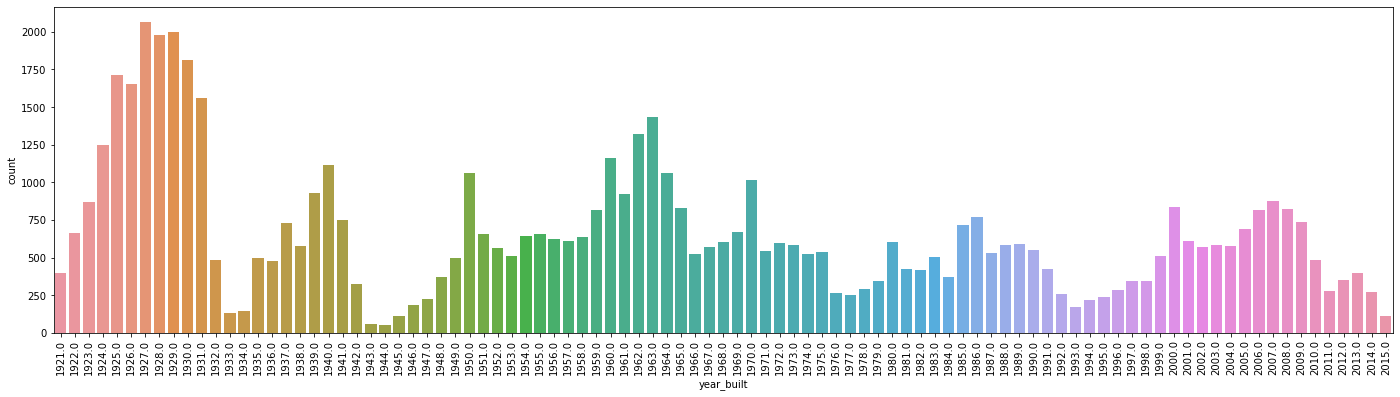

In [389]:
plt.figure(figsize=(24,6))
sns.countplot(x='year_built',data= df_train[(df_train.year_built>1920)])
plt.xticks(rotation=90)
plt.show()

The number of new construction reached the highest betweeb 1925 to 1931, and started to reduce 

#### Top 10 Building Facilities

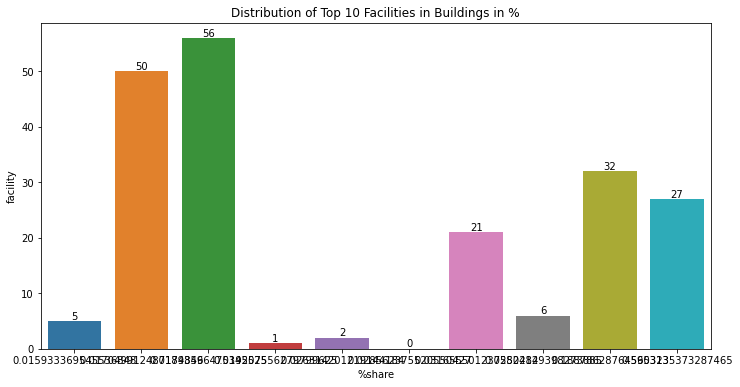

In [390]:
df = pd.DataFrame(df_train['facility_type'].value_counts().head(10))
df['facility'] = df.index
df.rename(columns = {'facility_type':'count'}, inplace = True)
df['%share'] = df['count']/df['count'].sum()
df.drop(columns=['count'],inplace=True)
df.reset_index(drop=True)
plt.figure(figsize=(12,6))
ax = sns.barplot(y='facility',x='%share',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Distribution of Top 10 Facilities in Buildings in %")
plt.show()